In [8]:
import os, sys, numpy as np, cv2
from scipy import signal
from skimage.util import img_as_float
from skimage.io import imread
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

%matplotlib inline

Running detector:


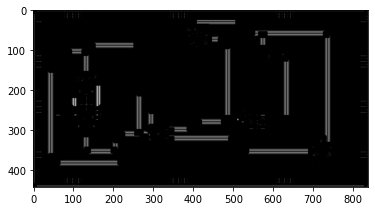

In [11]:
def bilinear_interpolation(x, y, mag):
    px, nx = int(np.floor(x)), int(np.ceil(x))
    py, ny = int(np.floor(y)), int(np.ceil(y))
    return (x-px)*(y-py)*mag[py,px] + (x-px)*(ny-y)*mag[ny,px] + (nx-x)*(y-py)*mag[py,nx] + (nx-x)*(ny-y)*mag[ny,nx]


def compute_edges_dxdy(I):
    """Returns the norm of dx and dy as the edge response function."""
    threshold = 1.5

    I = I.astype(np.float32)/255.
    I = gaussian_filter(I, sigma=2, mode='mirror')
    dx = signal.convolve2d(I, np.array([[-1, 0, 1]]), mode='same', boundary='symm')
    dy = signal.convolve2d(I, np.array([[-1, 0, 1]]).T, mode='same', boundary='symm')
    mag = np.sqrt(dx**2 + dy**2)

    mag = mag / np.max(mag)
    mag = mag * 255.
    mag = np.clip(mag, 0, 255)
    mag = mag.astype(np.uint8)

    sup_mag = np.copy(mag)

    m, n = mag.shape
    for i in range(m-1):
        for j in range(n-1):
            py, ny = i - dy[i, j], i + dy[i, j]
            px, nx = j - dx[i, j], j + dx[i, j]
            if mag[i, j] < threshold*bilinear_interpolation(px, py, mag) or mag[i, j] < threshold*bilinear_interpolation(nx, ny, mag):
                sup_mag[i, j] = 0
    return sup_mag

def detect_edges(path, fn):
    I = cv2.imread(path)
    gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    mag = fn(gray)
    plt.imshow(mag, cmap='gray')

print('Running detector:')
fn = compute_edges_dxdy
detect_edges('./pcb_image_1.png', fn)